C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
844/844 - 5s - 6ms/step - accuracy: 0.8006 - loss: 1.0778 - val_accuracy: 0.8345 - val_loss: 0.7606
Epoch 2/20
844/844 - 3s - 4ms/step - accuracy: 0.8352 - loss: 0.7066 - val_accuracy: 0.8578 - val_loss: 0.5908
Epoch 3/20
844/844 - 3s - 4ms/step - accuracy: 0.8414 - loss: 0.6098 - val_accuracy: 0.8392 - val_loss: 0.5855
Epoch 4/20
844/844 - 4s - 4ms/step - accuracy: 0.8442 - loss: 0.5796 - val_accuracy: 0.8508 - val_loss: 0.5631
Epoch 5/20
844/844 - 3s - 4ms/step - accuracy: 0.8475 - loss: 0.5573 - val_accuracy: 0.8423 - val_loss: 0.5654
Epoch 6/20
844/844 - 4s - 4ms/step - accuracy: 0.8463 - loss: 0.5566 - val_accuracy: 0.8320 - val_loss: 0.5886
Epoch 7/20
844/844 - 4s - 4ms/step - accuracy: 0.8502 - loss: 0.5423 - val_accuracy: 0.8502 - val_loss: 0.5397
Epoch 8/20
844/844 - 4s - 4ms/step - accuracy: 0.8502 - loss: 0.5424 - val_accuracy: 0.8537 - val_loss: 0.5438
Epoch 9/20
844/844 - 4s - 4ms/step - accuracy: 0.8512 - loss: 0.5382 - val_accuracy: 0.8487 - val_loss: 0.5386
E

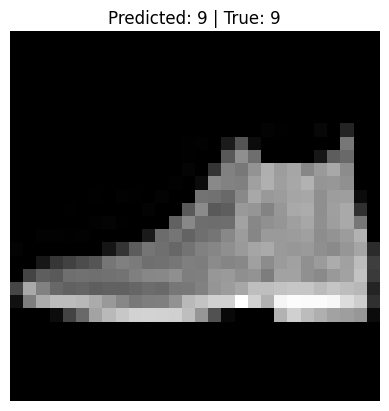

In [1]:
#  Regularized Deep Learning Model + TensorBoard Visualization


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
import numpy as np
import matplotlib.pyplot as plt
import datetime   # for unique TensorBoard log folder names

# Load and preprocess data
# -----------------------------
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

#  Build the model
# -----------------------------
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    # Dense Layer 1 — He Normal + L2 + BatchNorm + ReLU + Dropout
    layers.Dense(256, kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Dense Layer 2 — Glorot + GELU + BatchNorm + Dropout
    layers.Dense(128, kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('gelu'),
    layers.Dropout(0.3),

    # Dense Layer 3 — He + LeakyReLU
    layers.Dense(64, kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.LeakyReLU(alpha=0.1),

    # Output Layer — Softmax (10 classes)
    layers.Dense(10, activation='softmax')
])

# Compile the model
# -----------------------------
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Setup Callbacks
# -----------------------------

# EarlyStopping — stop training if val_loss stops improving
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ModelCheckpoint — save best model automatically
checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

#  TensorBoard — log everything for visualization
# Each run gets its own timestamped log folder
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, checkpoint, tensorboard_cb],
    verbose=2
)

#  Evaluate model
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

#  Visualize prediction
# -----------------------------
index = 0
pred = model.predict(X_test)
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(pred[index])} | True: {y_test[index]}")
plt.axis("off")
plt.show()


